In [81]:
import pandas as pd
import os
import numpy as np
import calendar
import matplotlib.pyplot as plt

### Merging 12 months of sale data into a single file

In [2]:
#read the path
file_path = "./Sales_Data"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
df_allData = pd.DataFrame()

# append the CSV files
for file in file_list:
    file_full_path = file_path + '/' + file
    df = pd.read_csv(file_full_path)
    df_allData = pd.concat([df_allData,df])

df_allData.to_csv('all_data.csv', index=False)

### Read in updated datafream

In [34]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the data!!

#### Drop rows of NaN

In [35]:
dropna_data = all_data.dropna(how='all')
dropna_data.head()
all_data = dropna_data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' Value in Month and delete it

In [36]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

all_data = all_data.loc[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to te correct type (str to numeric)

In [46]:
all_data.loc['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data.loc['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add Month Column

In [54]:
all_data.loc['Month'] = all_data['Order Date'].str[0:2]
all_data = all_data.dropna(subset=['Month'])
all_data.loc['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Q1: What was the best month for sales? How much was earned that month?


In [64]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
results = all_data.groupby('Month').sum() #sum() returns the sum of the values for the requested axis
best_month = results['Sales'].idxmax() #idxmax() returns the index of the maximum value
best_month_sales = results['Sales'].max() #max() returns the maximum value

best_month_name = calendar.month_name[int(best_month)]
print(f"Best month for sales: {best_month_name} with sales of {best_month_sales}")

Best month for sales: December with sales of 4613443.34


#### Visualization

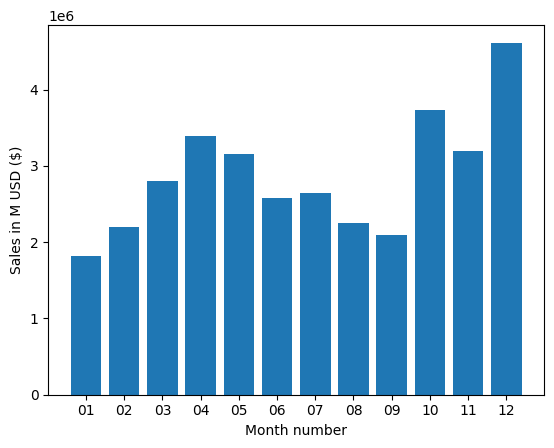

In [71]:
plt.bar(results.index, results['Sales']) #plt.bar(x,y)
plt.ylabel('Sales in M USD ($)')
plt.xlabel('Month number')
plt.show()

### Q2: What city sold the most product?

#### Add City Column

In [92]:
all_data['City'] = ""
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1].str.strip()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


#### Calculate Amount of products

In [102]:
product_group = all_data.groupby('Product').sum()
top_product = product_group['Quantity Ordered'].idxmax()
quantity_ordered = product_group['Quantity Ordered'].max()
print(f"Top product: {top_product} with quantity ordered of {quantity_ordered}")

product_per_city = all_data.groupby('City').sum()
city = product_per_city['Quantity Ordered'].idxmax()
quantity_ordered = product_per_city['Quantity Ordered'].max()
print(f"City with the most orders: {city} with quantity ordered of {quantity_ordered}")

Top product: AAA Batteries (4-pack) with quantity ordered of 31017.0
City with the most orders: San Francisco with quantity ordered of 50239.0
